# <u>Use of Optimizer in Neural Network</u>

---

### Kapil Panwar
### Lead Data Scientist, Mahindra Teqo Pvt Ltd.
Connect with me:
1. [Whatsapp](https://qrgo.page.link/TMiTp) 
2. [YouTube](https://qrgo.page.link/wh5tq)


---

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
sns.set()

Tensorflow verion

In [2]:
print(tf.__version__)

2.3.0


## Loading MNIST data

The data contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Checking shape of dataset 

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Checking a random image (7777 out of 60000)


8


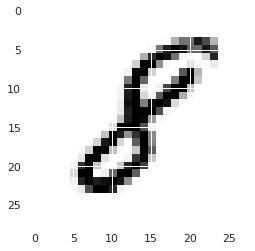

In [5]:
image_index = 7777 
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Preparing function for model creation

In [7]:
def model_creator(optimizer_name):
    print("************** ",optimizer_name," *************\n")
    model = Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(Dense(128, activation=tf.nn.relu))
    model.add(Dropout(0.2))
    model.add(Dense(10,activation=tf.nn.softmax))
    model.compile(optimizer=optimizer_name, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
    history= model.fit(x=x_train,y=y_train, epochs=15)
    print("\n************** Accuracy of ",optimizer_name," *************\n")
    accuracy = np.round(model.evaluate(x_test, y_test)[1]*100,2)
    print("\n************************************************************\n")
    return history, accuracy

## Trained model with all 8 optimization techniques available.

In [8]:
optimizer_performance = ['sgd', 'adam', 'adamax', 'adadelta', 'adagrad', 'ftrl', 'nadam', 'rmsprop']
performance = {}
for opti in optimizer_performance:
    history, accuracy = model_creator(opti)
    performance[opti] = [history, accuracy]

**************  sgd  *************

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4976 - accuracy: 0.8598
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2284 - accuracy: 0.9320
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1791 - accuracy: 0.9468
Epoch 4/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1529 - accuracy: 0.9539
Epoch 5/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1354 - accuracy: 0.9590
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1207 - accuracy: 0.9635
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1128 - accuracy: 0.9660
Epoch 8/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1043 - accuracy: 0.9687
Epoch 9/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0967 - accuracy: 0.9710
Epoch 10/15
1875/1875 [==============

## Plotting epoches vs accuracy of training model for all optimization techniques. 

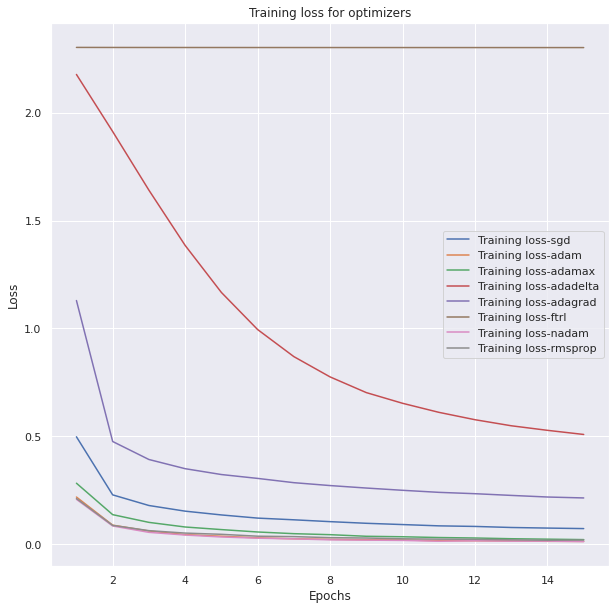

In [9]:
f = plt.figure(figsize=(10,10))
epochs = range(1,16)
for opti in optimizer_performance:
    loss_list = performance[opti][0].history['loss']
    plt.plot(epochs, loss_list, label='Training loss-'+opti)
plt.title('Training loss for optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

In [10]:
accuracy = []
for opti in optimizer_performance:
    accuracy.append(performance[opti][1])
accuracydf = pd.DataFrame()
accuracydf['Optimization Technique'] = optimizer_performance
accuracydf['Accuracy in %'] = accuracy

accuracydf = accuracydf.sort_values(['Accuracy in %'], ascending=False)
accuracydf.index = range(1, len(accuracydf)+1)

## Printing Test data accuracy for all optimizers 

In [11]:
accuracydf

,Optimization Technique,Accuracy in %
1,adamax,98.63
2,nadam,98.54
3,adam,98.52
4,rmsprop,98.48
5,sgd,98.24
6,adagrad,94.79
7,adadelta,89.31
8,ftrl,11.35
